## Descente de gradient

C'est l'algo de base pour trouver le minimum d'une fonction.


In [1]:
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

In [2]:
x=jnp.array(100.)
xs=[float(x)]
lr=0.1

U_of_x=lambda x: x**2
U_of_x_dx=jax.grad(U_of_x)

for k in range(1,10):
    U = U_of_x(x)
    U_dx=U_of_x_dx(x)
    x-=lr*U_dx
    xs.append(float(x))


print(xs)

[100.0, 80.0, 64.0, 51.20000076293945, 40.959999084472656, 32.76799774169922, 26.214397430419922, 20.97151756286621, 16.77721405029297, 13.421771049499512]


### Illustration graphique

In [ ]:
fig,ax=plt.subplots()

xx = jnp.linspace(-100., 100., 50)
uu = xx * xx

plt.plot(xx, uu)
plt.plot(xs, [x * x for x in xs], "ro-");

***À vous:*** Essayez avec différents learning rates
* Des trop grands (ex `lr=1.1`): La méthode diverge
* Des trop petits: la méthode rame.  

### En 2D

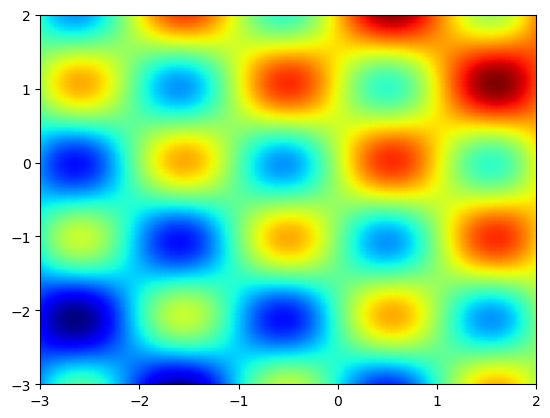

In [3]:
def U_of_xy(xy):
    x=xy[0]
    y=xy[1]
    return jnp.sin(3*x)*jnp.cos(3*y)+(x+y)/4


def plot_function(ax,U_of_xy):
    U_of_xyV=jax.vmap(U_of_xy)

    xV=jnp.linspace(-3,2,100)
    yV=jnp.linspace(-3,2,100)

    X_mat,Y_mat=jnp.meshgrid(xV,yV,indexing="ij")
    XY_flat=jnp.stack([X_mat.flatten(),Y_mat.flatten()],axis=1)
    U_mat=U_of_xyV(XY_flat).reshape(X_mat.shape)
    ax.pcolormesh(X_mat,Y_mat,U_mat,cmap="jet",shading="gouraud")

fig,ax=plt.subplots()
plot_function(ax,U_of_xy)

In [ ]:
def optimize(U_of_xy,xy0,lr,nb):

    xyV=[xy0]
    xy=xy0
    for i in range(nb):
        U=U_of_xy(xy)
        U_dxy=jax.grad(U_of_xy)(xy)
        xy-=lr*U_dxy
        xyV.append(xy)

    return jnp.stack(xyV)

In [ ]:
xy0=jnp.array([0.5,0.])
xyV=optimize(U_of_xy,xy0,0.05,15)
xyV.shape

In [ ]:
fig,ax=plt.subplots()
plot_function(ax,U_of_xy)
ax.plot(xyV[:,0],xyV[:,1],'k.');